<a href="https://colab.research.google.com/github/kylemath/DeepEEG/blob/master/notebooks/Deep_EEG_Muse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DeepEEG


In [5]:
!git clone https://github.com/kylemath/DeepEEG
!chmod +x ./DeepEEG/install.sh
%cd DeepEEG
!./install.sh
from utils import *
%matplotlib inline

fatal: destination path 'DeepEEG' already exists and is not an empty directory.
/content/DeepEEG
Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.0.3)


#Load Data, Preprocess, Concatenate


In [36]:
!git clone https://github.com/kylemath/eeg-notebooks/
data_dir = 'visual/cueing'

subs = [101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112,
        202, 203, 204, 205, 207, 208, 209, 210, 211,
        301, 302, 303, 304, 305, 306, 307, 308, 309]
nsesh = 2
event_id = {'LeftCue':1, 'RightCue':2}

raw = LoadMuseData(subs,nsesh,data_dir)

#subs = [ 1]
#nsesh = 1
#data_dir = 'visual/P300'
#event_names = ['Standard','Target']

#subs = [ 4]
#nsesh = 1
#data_dir = 'visual/SSVEP'
#event_names = ['f30Hz','f20Hz']

fatal: destination path 'eeg-notebooks' already exists and is not an empty directory.
Loading Data
Subject number 1/29
 Session number 1/2
 Session number 2/2
Subject number 2/29
 Session number 1/2
 Session number 2/2
Subject number 3/29
 Session number 1/2
 Session number 2/2
Subject number 4/29
 Session number 1/2
 Session number 2/2
Subject number 5/29
 Session number 1/2
 Session number 2/2
Subject number 6/29
 Session number 1/2
 Session number 2/2
Subject number 7/29
 Session number 1/2
 Session number 2/2
Subject number 8/29
 Session number 1/2
 Session number 2/2
Subject number 9/29
 Session number 1/2
 Session number 2/2
Subject number 10/29
 Session number 1/2
 Session number 2/2
Subject number 11/29
 Session number 1/2
 Session number 2/2
Subject number 12/29
 Session number 1/2
 Session number 2/2
Subject number 13/29
 Session number 1/2
 Session number 2/2
Subject number 14/29
 Session number 1/2
 Session number 2/2
Subject number 15/29
 Session number 1/2
 Session number

#Preprocess Data

In [37]:
epochs = PreProcess(raw,event_id)


Filtering Data Between 1 and 30 Hz.
4583 events found
Event IDs: [ 1  2 11 12 21 22]
Remaining Trials: 1408


#Run FeatureEngineer

epochs, model_type='NN',
frequency_domain=False,
normalization=True, electrode_median=False,
wavelet_decim=1,flims=(3,30),
f_bins=20,wave_cycles=3,
spect_baseline=[-1,-.5],
electrodes_out=[11,12,13,14,15],
test_split = 0.2, val_split = 0.2,
random_seed=1017, watermark = False

In [38]:
feats = FeatureEngineer(epochs,model_type='NN')

Constructing Time Domain Features
Normalizing X
Combined X Shape: (1408, 256, 4)
Combined Y Shape: (1408,)
Y Example (should be 1s & 0s): [1 1 0 0 0 0 0 1 0 0]
X Range: -12.106191:9.781672
Input Shape: (256, 4)
x_train shape: (844, 256, 4)
844 train samples
282 test samples
282 validation samples
Class Weights: [0.97011494 1.03178484]


# Run CreateModel

In [39]:
model, _ = CreateModel(feats)

Creating NN Model
Input shape: (256, 4)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                16400     
_________________________________________________________________
batch_normalization_6 (Batch (None, 16)                64        
_________________________________________________________________
activation_6 (Activation)    (None, 16)                0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 136       
_________________________________________________________________
batch_normalization_7 (Batch (None, 

# TrainTestVal

Training Model:
Train on 844 samples, validate on 282 samples
Epoch 1/20
844/844 [==============================] - 4s 5ms/step - loss: 0.8314 - acc: 0.4964 - val_loss: 0.7236 - val_acc: 0.5071
Epoch 2/20
844/844 [==============================] - 2s 2ms/step - loss: 0.7456 - acc: 0.4905 - val_loss: 0.7155 - val_acc: 0.4894
Epoch 3/20
844/844 [==============================] - 2s 2ms/step - loss: 0.7256 - acc: 0.5000 - val_loss: 0.7123 - val_acc: 0.4858
Epoch 4/20
844/844 [==============================] - 1s 1ms/step - loss: 0.7231 - acc: 0.4870 - val_loss: 0.7276 - val_acc: 0.4858
Epoch 5/20
844/844 [==============================] - 1s 1ms/step - loss: 0.7144 - acc: 0.4846 - val_loss: 0.7161 - val_acc: 0.4929
Epoch 6/20
844/844 [==============================] - 1s 1ms/step - loss: 0.7056 - acc: 0.5178 - val_loss: 0.6990 - val_acc: 0.4965
Epoch 7/20
844/844 [==============================] - 2s 2ms/step - loss: 0.6993 - acc: 0.5379 - val_loss: 0.7019 - val_acc: 0.4858
Epoch 8/20
844

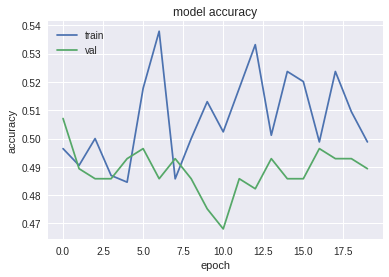

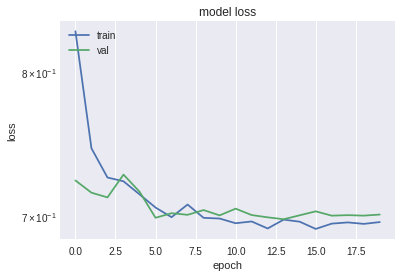

282/282 [==============================] - 0s 471us/step
['loss', 'acc']
Test loss: 0.6953090006578053
Test accuracy: 0.5106382978723404


(<keras.engine.sequential.Sequential at 0x7fdb27d07668>,
 {'acc': 0.5106382978723404, 'score': 0.6953090006578053})

In [40]:
TrainTestVal(model, feats)